In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [2]:
scenario = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/run_scenarios/demand_099-carbon_optimal_carbon_policy-datetime_2020-07-15_13-27-35-capacity_1-demand_distribution_None.csv.csv")
scenario

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted
0,0,325767.24,214949.52,23300.555309,29579.745224,3154.551065,165604.866874,10172.875,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.261351e+10,88.375121,1175.458908
1,1,227843.70,198604.42,23464.752699,29595.668288,3122.286319,165604.866874,1884.710,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,7.358169e+09,56.082017,916.954745
2,2,321766.14,223462.56,21601.843042,29224.130128,1658.945670,165604.866874,9310.060,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.579708e+10,87.598413,1183.656971
3,3,329527.14,239103.77,23278.203832,29656.706700,3188.160175,165604.866874,12707.000,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,3.261493e+10,108.202997,1243.057693
4,4,125890.14,152870.53,22184.551132,29595.668288,3116.600720,147569.693113,0.000,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.900901e+10,42.593524,596.671979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,131,9921.44,6278.92,65509.440519,22851.429675,531877.214648,436797.357690,0.000,0,17730.0,14475.0,33816.2,6979.5,494513.8,45661.0,540.0,306.35572,-1.882234e+12,14.891851,34.151293
132,132,0.00,0.00,59378.779841,19719.148803,379123.696994,273191.566766,0.000,0,17730.0,14475.0,33816.2,6979.5,494513.8,45661.0,540.0,306.35572,-1.929740e+12,5.637925,0.000000
133,133,5752.36,1564.20,67766.748636,22736.152894,561299.460984,425243.701193,0.000,0,17730.0,14475.0,33816.2,6979.5,494513.8,45661.0,540.0,306.35572,-1.984492e+12,9.892920,15.167644
134,134,0.00,0.00,59719.744609,17311.066430,400372.963063,231611.966426,0.000,0,17730.0,14475.0,33816.2,6979.5,494513.8,45661.0,540.0,306.35572,-2.056726e+12,4.896133,0.000000


In [3]:
def get_mix(df):
#     df['actual_perc'] = df['value_actual'] / df['value_actual'].sum()
    df['simulated_perc'] = df['actual'] / df['actual'].sum()
    return df


def get_projection_difference_sum(results_df, year_to_compare=None):
    ROOT_DIR = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run'
    
    contributed_results = results_df.filter(regex='contributed_')  # .tail(MARKET_TIME_SPLICES)
    contributed_results *= 1 / 24

    # best_mix_year = contributed_results.apply(get_year)
    best_mix_year = contributed_results.copy()
    # best_mix_year['year'] = np.repeat(list(range(YEARS_TO_RUN)), 8)
    best_mix_year['year'] = np.repeat(list(range(int(len(best_mix_year.index)/8))), 8)
    # print("contributed_results: {}".format(contributed_results))
    best_mix_year = best_mix_year.rename(columns={'contributed_PV': "contributed_solar"})
    cluster_size = pd.Series([22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0])
    # contributed_results['cluster_size'] = [22.0, 30.0, 32.0, 35.0, 43.0, 53.0, 68.0, 82.0]
    # print("best_mix_year: {}".format(best_mix_year))
    results_wa = best_mix_year.groupby('year').apply(
        lambda x: np.average(x, weights=cluster_size.values, axis=0)).to_frame()
    # print("results_wa: {}".format(results_wa))
    results_wa_split = pd.DataFrame(results_wa)
    # print(results_wa.values)
    results_wa_split[
        ['ccgt', "coal", 'onshore', 'offshore', 'solar', 'nuclear', 'recip_gas', 'biomass', 'year']] = pd.DataFrame(
        results_wa[0].values.tolist(), index=results_wa.index)
    results_wa_split

#     results_wa_split['wind'] = results_wa_split['offshore'] + results_wa_split['onshore']
#     results_wa_split['Natural_gas'] = results_wa_split['ccgt'] + results_wa_split['recip_gas']
#     results_wa_split['Renewables'] = results_wa_split['biomass'] + results_wa_split['wind'] + results_wa_split['solar']
#     results_wa_split = results_wa_split.drop(['offshore', 'onshore', 'ccgt', 'recip_gas', 'biomass', 'wind', 'solar'],
#                                              axis=1)
    results_wa_split = results_wa_split.drop([0, 'year'], axis=1)
    results_wa_long = pd.melt(results_wa_split.reset_index(), id_vars="year")
    results_wa_long['year'] += 2018
    # print("results_wa_long: {}".format(results_wa_long))

    if year_to_compare is not None:
        # results_wa_long = results_wa_long[results_wa_long.year == year_to_compare+1]
        results_wa_long = results_wa_long[results_wa_long.year == year_to_compare]

    results_wa_long = results_wa_long.rename(columns={'variable': "fuel_type"})
    results_wa_long = results_wa_long.set_index(['year', 'fuel_type'])

    joined = results_wa_long.rename(columns={'value': 'actual'})
    joined = joined.groupby("year").apply(get_mix)
    joined = joined.reset_index()
    return joined

In [4]:
per_year_dat = get_projection_difference_sum(scenario)

per_year_long = per_year_dat.melt(['year','fuel_type'])
per_year_long

,year,fuel_type,variable,value
0,2018,ccgt,actual,9579.356911
1,2019,ccgt,actual,9960.543274
2,2020,ccgt,actual,7434.219897
3,2021,ccgt,actual,7277.669664
4,2022,ccgt,actual,7036.882233
...,...,...,...,...
267,2030,biomass,simulated_perc,0.000000
268,2031,biomass,simulated_perc,0.000000
269,2032,biomass,simulated_perc,0.000000
270,2033,biomass,simulated_perc,0.000000


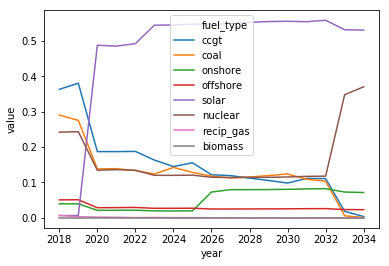

In [5]:
sns.lineplot(data=per_year_long[per_year_long.variable=="simulated_perc"], x="year", y="value", hue="fuel_type")

In [6]:
path = '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/run_scenarios' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for i, filename in enumerate(all_files):
    demand = filename.split("/")[9].split("_")[1].split("-")[0]
    
    df = pd.read_csv(filename, index_col=None, header=0)
    df['demand_scenario'] = demand
    df['run_number'] = i
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,Unnamed: 0,contributed_CCGT,contributed_Coal,contributed_Onshore,contributed_Offshore,contributed_PV,contributed_Nuclear,contributed_Recip_gas,contributed_Biomass,total_CCGT,total_Coal,total_Onshore,total_Offshore,total_PV,total_Nuclear,total_Recip_gas,Carbon_tax,total_genco_wealth,Electricity_cost,Carbon_emitted,demand_scenario,run_number
0,0,334943.64,198559.39,23300.555309,29579.745224,3154.551065,165604.866874,12177.865,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.283054e+10,90.083705,1162.508396,098,0
1,1,203187.84,220590.12,23464.752699,29595.668288,3122.286319,165604.866874,1884.710,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,6.670543e+09,54.553201,912.359937,098,0
2,2,324127.14,210557.91,21601.843042,29224.130128,1658.945670,165604.866874,11311.170,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.463277e+10,89.598973,1163.716644,098,0
3,3,325119.18,243675.50,23278.203832,29656.706700,3188.160175,165604.866874,11486.255,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,2.729024e+10,98.251785,1239.984432,098,0
4,4,143457.36,131808.34,22181.122900,29595.668288,3116.600720,146645.341623,0.000,0,31912.0,14475.0,8862.6,6983.8,3377.8,9361.0,971.5,130.88900,1.212847e+10,42.989311,585.335307,098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9107,131,132157.50,144630.65,79862.786968,24796.837395,827823.363192,335574.972600,0.000,0,14788.0,14475.0,36316.2,6979.5,773393.8,25861.0,0.0,306.35572,-1.055404e+12,150.293112,591.008268,1025,66
9108,132,91980.66,59768.21,75561.174227,23361.991785,567526.860001,269771.318830,0.000,0,14788.0,14475.0,36316.2,6979.5,773393.8,25861.0,0.0,306.35572,-1.064803e+12,46.466359,320.087404,1025,66
9109,133,130140.84,139945.17,82735.087181,25387.617172,926164.163456,341513.967777,0.000,0,14788.0,14475.0,36316.2,6979.5,773393.8,25861.0,0.0,306.35572,-9.724005e+11,145.462811,576.459278,1025,66
9110,134,78512.94,64791.81,80029.209363,22437.878059,612905.675045,243562.931898,0.000,0,14788.0,14475.0,36316.2,6979.5,773393.8,25861.0,0.0,306.35572,-9.891087e+11,39.631843,303.957583,1025,66


In [7]:


# per_year_dat = get_projection_difference_sum()

for i in pd.unique(frame.demand_scenario):
    demand_scenario = frame[frame.demand_scenario==i]
    per_year_dat = demand_scenario.groupby("run_number").apply(lambda x: get_projection_difference_sum(x))

    per_year_long = per_year_dat.melt(['year','fuel_type'])
    per_year_long = per_year_long.rename(columns = {'fuel_type':"Fuel Type"})
    print("demand scenario: "+i)
    
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.show()
#     plt.close()
    
    
    
    sns.set(font_scale=1)
    sns.set_style("whitegrid")
    g = sns.lineplot(data=per_year_long[per_year_long.variable=="simulated_perc"], x="year", y="value", hue="Fuel Type")
    g.set(xlabel='Year', ylabel='Electricity Mix (%)')
    lgd = plt.legend(bbox_to_anchor=(1,-0.2), borderaxespad=0., ncol=4)
    plt.ylim(0,0.8)
#     plt.show()
    plt.savefig("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/scenario_runs/notebooks/figures/{}_demand_mix.pdf".format(i), dpi=1000, bbox_inches='tight')
    plt.close()


demand scenario: 098
demand scenario: 1025
demand scenario: 101
demand scenario: 097
demand scenario: 10
demand scenario: 099
demand scenario: 102


In [8]:
m = 10.96667
c = 130.889

y = range(17)

carbon_tax = [year * m + c for year in y]
carbon_tax =  carbon_tax
print(carbon_tax)

year_axis = [year + 2018 for year in y]

carbon_policy = pd.DataFrame({"carbon_tax":carbon_tax, "year":year_axis})
carbon_policy

[130.889, 141.85567, 152.82234, 163.78901000000002, 174.75568, 185.72235, 196.68902000000003, 207.65569000000002, 218.62236000000001, 229.58903, 240.5557, 251.52237000000002, 262.48904000000005, 273.45571, 284.42238000000003, 295.38905, 306.35572]


,carbon_tax,year
0,130.88900,2018
1,141.85567,2019
2,152.82234,2020
3,163.78901,2021
4,174.75568,2022
5,185.72235,2023
6,196.68902,2024
7,207.65569,2025
8,218.62236,2026
9,229.58903,2027


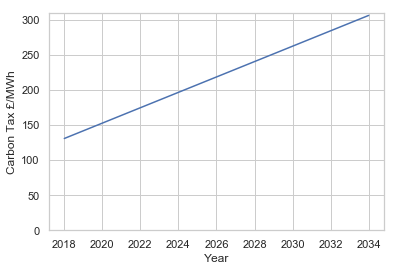

In [9]:
sns.lineplot(data=carbon_policy, x="year", y="carbon_tax")
plt.ylim(0,310)
#     plt.show()
plt.ylabel("Carbon Tax £/MWh")
plt.xlabel("Year")
plt.savefig("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/scenario_runs/notebooks/figures/optimal_carbon_strategy.pdf", dpi=1000, bbox_inches='tight')
plt.show()
plt.close()
